In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier #knn classifier
from sklearn.naive_bayes import GaussianNB as gnb #naive bayes classifier
from sklearn.model_selection import cross_val_score #cross validation score
from sklearn.model_selection import train_test_split #train test split function
from sklearn.metrics import accuracy_score, confusion_matrix #metrics for classification models
import scipy.stats as stats 
from sklearn.inspection import permutation_importance

# Data Preparation

In [5]:
df = pd.read_csv('all_seasons 4.csv')

In [6]:
df.head()

Unnamed: 0      player_name team_abbreviation  age  player_height  \
0           0    Travis Knight               LAL   22         213.36   
1           1        Matt Fish               MIA   27         210.82   
2           2     Matt Bullard               HOU   30         208.28   
3           3     Marty Conlon               BOS   29         210.82   
4           4  Martin Muursepp               DAL   22         205.74   

   player_weight                    college country draft_year draft_round  \
0      106.59412                Connecticut     USA       1996           1   
1      106.59412  North Carolina-Wilmington     USA       1992           2   
2      106.59412                       Iowa     USA  Undrafted   Undrafted   
3      111.13004                 Providence     USA  Undrafted   Undrafted   
4      106.59412                       None     USA       1996           1   

   ...  pts  reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  \
0  ...  4.8  4.5  0.5         6.2     0.127     0.182    0.142   0.536   
1  ...  0.3  0.8  0.0       -15.1     0.143     0.267    0.265   0.333   
2  ...  4.5  1.6  0.9         0.9     0.016     0.115    0.151   0.535   
3  ...  7.8  4.4  1.4        -9.0     0.083     0.152    0.167   0.542   
4  ...  3.7  1.6  0.5       -14.5     0.109     0.118    0.233   0.482   

   ast_pct   season  
0    0.052  1996-97  
1    0.000  1996-97  
2    0.099  1996-97  
3    0.101  1996-97  
4    0.114  1996-97  

[5 rows x 22 columns]

Pulling NBA teams' full name from wikipedia

In [7]:
import requests
abr = pd.read_html('https://en.wikipedia.org/wiki/Wikipedia:WikiProject_National_Basketball_Association/National_Basketball_Association_team_abbreviations')
abr

[                       0                       1
 0   Abbreviation/Acronym               Franchise
 1                    ATL           Atlanta Hawks
 2                    BKN           Brooklyn Nets
 3                    BOS          Boston Celtics
 4                    CHA       Charlotte Hornets
 5                    CHI           Chicago Bulls
 6                    CLE     Cleveland Cavaliers
 7                    DAL        Dallas Mavericks
 8                    DEN          Denver Nuggets
 9                    DET         Detroit Pistons
 10                   GSW   Golden State Warriors
 11                   HOU         Houston Rockets
 12                   IND          Indiana Pacers
 13                   LAC    Los Angeles Clippers
 14                   LAL      Los Angeles Lakers
 15                   MEM       Memphis Grizzlies
 16                   MIA              Miami Heat
 17                   MIL         Milwaukee Bucks
 18                   MIN  Minnesota Timberwolves


In [8]:
abrtable = abr[0]
abrtable.columns = ['abr','fullname']
abrtable

abr                fullname
0   Abbreviation/Acronym               Franchise
1                    ATL           Atlanta Hawks
2                    BKN           Brooklyn Nets
3                    BOS          Boston Celtics
4                    CHA       Charlotte Hornets
5                    CHI           Chicago Bulls
6                    CLE     Cleveland Cavaliers
7                    DAL        Dallas Mavericks
8                    DEN          Denver Nuggets
9                    DET         Detroit Pistons
10                   GSW   Golden State Warriors
11                   HOU         Houston Rockets
12                   IND          Indiana Pacers
13                   LAC    Los Angeles Clippers
14                   LAL      Los Angeles Lakers
15                   MEM       Memphis Grizzlies
16                   MIA              Miami Heat
17                   MIL         Milwaukee Bucks
18                   MIN  Minnesota Timberwolves
19                   NOP    New Orleans Pelicans
20                   NYK         New York Knicks
21                   OKC   Oklahoma City Thunder
22                   ORL           Orlando Magic
23                   PHI      Philadelphia 76ers
24                   PHX            Phoenix Suns
25                   POR  Portland Trail Blazers
26                   SAC        Sacramento Kings
27                   SAS       San Antonio Spurs
28                   TOR         Toronto Raptors
29                   UTA               Utah Jazz
30                   WSH      Washington Wizards

We are only keeping the teams' short name.

In [9]:
abrtable['fullname'] =abrtable['fullname'].str.split(' ').str[-1] 
abrtable

abr      fullname
0   Abbreviation/Acronym     Franchise
1                    ATL         Hawks
2                    BKN          Nets
3                    BOS       Celtics
4                    CHA       Hornets
5                    CHI         Bulls
6                    CLE     Cavaliers
7                    DAL     Mavericks
8                    DEN       Nuggets
9                    DET       Pistons
10                   GSW      Warriors
11                   HOU       Rockets
12                   IND        Pacers
13                   LAC      Clippers
14                   LAL        Lakers
15                   MEM     Grizzlies
16                   MIA          Heat
17                   MIL         Bucks
18                   MIN  Timberwolves
19                   NOP      Pelicans
20                   NYK        Knicks
21                   OKC       Thunder
22                   ORL         Magic
23                   PHI         76ers
24                   PHX          Suns
25                   POR       Blazers
26                   SAC         Kings
27                   SAS         Spurs
28                   TOR       Raptors
29                   UTA          Jazz
30                   WSH       Wizards

Matching the team names table with the players' info table.

In [10]:
df = df.merge(abrtable, left_on='team_abbreviation', right_on = 'abr', how='left')

In [11]:
df.head()

Unnamed: 0      player_name team_abbreviation  age  player_height  \
0           0    Travis Knight               LAL   22         213.36   
1           1        Matt Fish               MIA   27         210.82   
2           2     Matt Bullard               HOU   30         208.28   
3           3     Marty Conlon               BOS   29         210.82   
4           4  Martin Muursepp               DAL   22         205.74   

   player_weight                    college country draft_year draft_round  \
0      106.59412                Connecticut     USA       1996           1   
1      106.59412  North Carolina-Wilmington     USA       1992           2   
2      106.59412                       Iowa     USA  Undrafted   Undrafted   
3      111.13004                 Providence     USA  Undrafted   Undrafted   
4      106.59412                       None     USA       1996           1   

   ...  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  \
0  ...  0.5         6.2     0.127     0.182    0.142   0.536    0.052   
1  ...  0.0       -15.1     0.143     0.267    0.265   0.333    0.000   
2  ...  0.9         0.9     0.016     0.115    0.151   0.535    0.099   
3  ...  1.4        -9.0     0.083     0.152    0.167   0.542    0.101   
4  ...  0.5       -14.5     0.109     0.118    0.233   0.482    0.114   

    season  abr   fullname  
0  1996-97  LAL     Lakers  
1  1996-97  MIA       Heat  
2  1996-97  HOU    Rockets  
3  1996-97  BOS    Celtics  
4  1996-97  DAL  Mavericks  

[5 rows x 24 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11700 entries, 0 to 11699
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         11700 non-null  int64  
 1   player_name        11700 non-null  object 
 2   team_abbreviation  11700 non-null  object 
 3   age                11700 non-null  int64  
 4   player_height      11700 non-null  float64
 5   player_weight      11700 non-null  float64
 6   college            11700 non-null  object 
 7   country            11700 non-null  object 
 8   draft_year         11700 non-null  object 
 9   draft_round        11700 non-null  object 
 10  draft_number       11700 non-null  object 
 11  gp                 11700 non-null  int64  
 12  pts                11700 non-null  float64
 13  reb                11700 non-null  float64
 14  ast                11700 non-null  float64
 15  net_rating         11700 non-null  float64
 16  oreb_pct           117

There are some missing data in the 'abr' and 'fullname' columns because some NBA teams no longer exisit.

In [13]:
df[df['fullname'].isna()]

Unnamed: 0        player_name team_abbreviation  age  player_height  \
18             18         Malik Rose               CHH   22         200.66   
24             24        Matt Geiger               CHH   27         215.90   
37             37      Nate McMillan               SEA   32         195.58   
39             39   Lorenzo Williams               WAS   27         205.74   
40             40      Muggsy Bogues               CHH   32         160.02   
...           ...                ...               ...  ...            ...   
11440       11440        Robin Lopez               WAS   33         213.36   
11449       11449      Rui Hachimura               WAS   23         203.20   
11450       11450  Russell Westbrook               WAS   32         190.50   
11495       11495          Raul Neto               WAS   29         185.42   
11555       11555      Thomas Bryant               WAS   23         208.28   

       player_weight               college country draft_year draft_round  \
18        113.398000                Drexel     USA       1996           2   
24        111.130040          Georgia Tech     USA       1992           2   
37         90.718400  North Carolina State     USA       1986           2   
39        104.326160               Stetson     USA  Undrafted   Undrafted   
40         63.956472           Wake Forest     USA       1987           1   
...              ...                   ...     ...        ...         ...   
11440     127.459352              Stanford     USA       2008           1   
11449     104.326160               Gonzaga   Japan       2019           1   
11450      90.718400                  UCLA     USA       2008           1   
11495      81.646560                  None  Brazil       2013           2   
11555     112.490816               Indiana     USA       2017           2   

       ...   ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  \
18     ...   0.6         1.3     0.169     0.219    0.161   0.515    0.089   
24     ...   0.8         0.9     0.120     0.179    0.215   0.538    0.065   
37     ...   3.8        14.1     0.023     0.161    0.113   0.522    0.265   
39     ...   0.2       -10.9     0.121     0.181    0.087   0.660    0.022   
40     ...   7.2         6.0     0.017     0.074    0.149   0.554    0.366   
...    ...   ...         ...       ...       ...      ...     ...      ...   
11440  ...   0.8        -1.1     0.097     0.092    0.169   0.661    0.060   
11449  ...   1.4        -2.8     0.026     0.139    0.180   0.549    0.062   
11450  ...  11.7        -1.2     0.043     0.249    0.295   0.509    0.477   
11495  ...   2.3        -1.0     0.019     0.087    0.155   0.575    0.141   
11555  ...   1.5        -2.1     0.063     0.163    0.163   0.704    0.079   

        season  abr  fullname  
18     1996-97  NaN       NaN  
24     1996-97  NaN       NaN  
37     1996-97  NaN       NaN  
39     1996-97  NaN       NaN  
40     1996-97  NaN       NaN  
...        ...  ...       ...  
11440  2020-21  NaN       NaN  
11449  2020-21  NaN       NaN  
11450  2020-21  NaN       NaN  
11495  2020-21  NaN       NaN  
11555  2020-21  NaN       NaN  

[1174 rows x 24 columns]

We will delete the teams that no longer exisit and their players' info.

In [14]:
df = df.dropna()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10526 entries, 0 to 11699
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         10526 non-null  int64  
 1   player_name        10526 non-null  object 
 2   team_abbreviation  10526 non-null  object 
 3   age                10526 non-null  int64  
 4   player_height      10526 non-null  float64
 5   player_weight      10526 non-null  float64
 6   college            10526 non-null  object 
 7   country            10526 non-null  object 
 8   draft_year         10526 non-null  object 
 9   draft_round        10526 non-null  object 
 10  draft_number       10526 non-null  object 
 11  gp                 10526 non-null  int64  
 12  pts                10526 non-null  float64
 13  reb                10526 non-null  float64
 14  ast                10526 non-null  float64
 15  net_rating         10526 non-null  float64
 16  oreb_pct           105

Joining with the Historical NBA performance table.

In [16]:
winrate = pd.read_excel('Historical NBA Performance.xlsx')

In [17]:
winrate.head()

Year     Team Record  Winning Percentage
0  2015-16  Celtics  48-34               0.585
1  2014-15  Celtics  40-42               0.488
2  2013-14  Celtics  25-57               0.305
3  2012-13  Celtics  41-40               0.506
4  2011-12  Celtics  39-27               0.591

In [18]:
winrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1569 entries, 0 to 1568
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                1569 non-null   object 
 1   Team                1569 non-null   object 
 2   Record              1569 non-null   object 
 3   Winning Percentage  1569 non-null   float64
dtypes: float64(1), object(3)
memory usage: 49.2+ KB


In [19]:
winrate['seasonname'] = winrate['Year'].astype(str) + winrate['Team']

In [20]:
winrate.head()

Year     Team Record  Winning Percentage      seasonname
0  2015-16  Celtics  48-34               0.585  2015-16Celtics
1  2014-15  Celtics  40-42               0.488  2014-15Celtics
2  2013-14  Celtics  25-57               0.305  2013-14Celtics
3  2012-13  Celtics  41-40               0.506  2012-13Celtics
4  2011-12  Celtics  39-27               0.591  2011-12Celtics

In [21]:
df["seasoname"] = df["season"] + df["fullname"]

In [22]:
df

Unnamed: 0          player_name team_abbreviation  age  player_height  \
0               0        Travis Knight               LAL   22         213.36   
1               1            Matt Fish               MIA   27         210.82   
2               2         Matt Bullard               HOU   30         208.28   
3               3         Marty Conlon               BOS   29         210.82   
4               4      Martin Muursepp               DAL   22         205.74   
...           ...                  ...               ...  ...            ...   
11695       11695  Matthew Dellavedova               CLE   30         190.50   
11696       11696     Maurice Harkless               SAC   28         200.66   
11697       11697            Max Strus               MIA   25         195.58   
11698       11698    Marcus Morris Sr.               LAC   31         203.20   
11699       11699         Aaron Gordon               DEN   25         203.20   

       player_weight                          college    country draft_year  \
0         106.594120                      Connecticut        USA       1996   
1         106.594120        North Carolina-Wilmington        USA       1992   
2         106.594120                             Iowa        USA  Undrafted   
3         111.130040                       Providence        USA  Undrafted   
4         106.594120                             None        USA       1996   
...              ...                              ...        ...        ...   
11695      90.718400  St.Mary's College of California  Australia  Undrafted   
11696      99.790240                       St. John's        USA       2012   
11697      97.522280                           DePaul        USA  Undrafted   
11698      98.883056                           Kansas        USA       2011   
11699     106.594120                          Arizona        USA       2014   

      draft_round  ... net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  \
0               1  ...        6.2     0.127     0.182    0.142   0.536   
1               2  ...      -15.1     0.143     0.267    0.265   0.333   
2       Undrafted  ...        0.9     0.016     0.115    0.151   0.535   
3       Undrafted  ...       -9.0     0.083     0.152    0.167   0.542   
4               1  ...      -14.5     0.109     0.118    0.233   0.482   
...           ...  ...        ...       ...       ...      ...     ...   
11695   Undrafted  ...       -3.1     0.029     0.085    0.125   0.312   
11696           1  ...       -2.9     0.017     0.097    0.114   0.527   
11697   Undrafted  ...       -4.2     0.011     0.073    0.179   0.597   
11698           1  ...        4.2     0.025     0.133    0.194   0.614   
11699           1  ...        2.1     0.055     0.150    0.204   0.547   

       ast_pct   season  abr   fullname         seasoname  
0        0.052  1996-97  LAL     Lakers     1996-97Lakers  
1        0.000  1996-97  MIA       Heat       1996-97Heat  
2        0.099  1996-97  HOU    Rockets    1996-97Rockets  
3        0.101  1996-97  BOS    Celtics    1996-97Celtics  
4        0.114  1996-97  DAL  Mavericks  1996-97Mavericks  
...        ...      ...  ...        ...               ...  
11695    0.337  2020-21  CLE  Cavaliers  2020-21Cavaliers  
11696    0.071  2020-21  SAC      Kings      2020-21Kings  
11697    0.074  2020-21  MIA       Heat       2020-21Heat  
11698    0.056  2020-21  LAC   Clippers   2020-21Clippers  
11699    0.165  2020-21  DEN    Nuggets    2020-21Nuggets  

[10526 rows x 25 columns]

In [23]:
df = df.merge(winrate, left_on='seasoname', right_on = 'seasonname', how='left')

In [24]:
df.head()

Unnamed: 0      player_name team_abbreviation  age  player_height  \
0           0    Travis Knight               LAL   22         213.36   
1           1        Matt Fish               MIA   27         210.82   
2           2     Matt Bullard               HOU   30         208.28   
3           3     Marty Conlon               BOS   29         210.82   
4           4  Martin Muursepp               DAL   22         205.74   

   player_weight                    college country draft_year draft_round  \
0      106.59412                Connecticut     USA       1996           1   
1      106.59412  North Carolina-Wilmington     USA       1992           2   
2      106.59412                       Iowa     USA  Undrafted   Undrafted   
3      111.13004                 Providence     USA  Undrafted   Undrafted   
4      106.59412                       None     USA       1996           1   

   ... ast_pct   season  abr   fullname         seasoname     Year       Team  \
0  ...   0.052  1996-97  LAL     Lakers     1996-97Lakers  1996-97     Lakers   
1  ...   0.000  1996-97  MIA       Heat       1996-97Heat  1996-97       Heat   
2  ...   0.099  1996-97  HOU    Rockets    1996-97Rockets  1996-97    Rockets   
3  ...   0.101  1996-97  BOS    Celtics    1996-97Celtics  1996-97    Celtics   
4  ...   0.114  1996-97  DAL  Mavericks  1996-97Mavericks  1996-97  Mavericks   

   Record  Winning Percentage        seasonname  
0   56-26               0.683     1996-97Lakers  
1   61-21               0.744       1996-97Heat  
2   57-25               0.695    1996-97Rockets  
3   15-67               0.183    1996-97Celtics  
4   24-58               0.293  1996-97Mavericks  

[5 rows x 30 columns]

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10900 entries, 0 to 10899
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10900 non-null  int64  
 1   player_name         10900 non-null  object 
 2   team_abbreviation   10900 non-null  object 
 3   age                 10900 non-null  int64  
 4   player_height       10900 non-null  float64
 5   player_weight       10900 non-null  float64
 6   college             10900 non-null  object 
 7   country             10900 non-null  object 
 8   draft_year          10900 non-null  object 
 9   draft_round         10900 non-null  object 
 10  draft_number        10900 non-null  object 
 11  gp                  10900 non-null  int64  
 12  pts                 10900 non-null  float64
 13  reb                 10900 non-null  float64
 14  ast                 10900 non-null  float64
 15  net_rating          10900 non-null  float64
 16  oreb

Again, there are some missing data related to the winning ratio.

In [26]:
df[df['Winning Percentage'].isna()].groupby('season').team_abbreviation.value_counts()

season   team_abbreviation
1996-97  POR                  16
1997-98  POR                  17
1999-00  POR                  14
2000-01  POR                  16
2001-02  POR                  15
2002-03  POR                  15
2003-04  POR                  19
2004-05  POR                  16
2005-06  POR                  14
2006-07  POR                  16
2007-08  POR                  13
2008-09  POR                  14
2009-10  POR                  15
2010-11  POR                  16
2011-12  POR                  14
2012-13  POR                  15
2013-14  POR                  15
2014-15  POR                  16
2015-16  POR                  16
Name: team_abbreviation, dtype: int64

In [27]:
df[df['Winning Percentage'].isna()]

Unnamed: 0       player_name team_abbreviation  age  player_height  \
16            16      Marcus Brown               POR   23         190.50   
37            43   Mitchell Butler               POR   26         195.58   
70            82    Kenny Anderson               POR   26         185.42   
135          164     Stacey Augmon               POR   28         203.20   
153          186   Rasheed Wallace               POR   22         210.82   
...          ...               ...               ...  ...            ...   
8333        9040       Noah Vonleh               POR   20         205.74   
8335        9042      Luis Montero               POR   23         200.66   
8358        9068  Maurice Harkless               POR   23         205.74   
8360        9070    Meyers Leonard               POR   24         215.90   
8362        9072     Mason Plumlee               POR   26         210.82   

      player_weight            college             country draft_year  \
16        83.914520       Murray State                 USA       1996   
37        95.254320               UCLA                 USA  Undrafted   
70        76.203456       Georgia Tech                 USA       1991   
135       92.986360   Nevada-Las Vegas                 USA       1991   
153      102.058200     North Carolina                 USA       1995   
...             ...                ...                 ...        ...   
8333     108.862080            Indiana                 USA       2014   
8335      83.914520  Westchester CC NY  Dominican Republic  Undrafted   
8358      97.522280    St. John's (NY)                 USA       2012   
8360     111.130040           Illinois                 USA       2012   
8362     106.594120               Duke                 USA       2013   

     draft_round  ... ast_pct   season  abr  fullname       seasoname  Year  \
16             2  ...   0.169  1996-97  POR   Blazers  1996-97Blazers   NaN   
37     Undrafted  ...   0.114  1996-97  POR   Blazers  1996-97Blazers   NaN   
70             1  ...   0.310  1996-97  POR   Blazers  1996-97Blazers   NaN   
135            1  ...   0.093  1996-97  POR   Blazers  1996-97Blazers   NaN   
153            1  ...   0.067  1996-97  POR   Blazers  1996-97Blazers   NaN   
...          ...  ...     ...      ...  ...       ...             ...   ...   
8333           1  ...   0.037  2015-16  POR   Blazers  2015-16Blazers   NaN   
8335   Undrafted  ...   0.067  2015-16  POR   Blazers  2015-16Blazers   NaN   
8358           1  ...   0.068  2015-16  POR   Blazers  2015-16Blazers   NaN   
8360           1  ...   0.103  2015-16  POR   Blazers  2015-16Blazers   NaN   
8362           1  ...   0.161  2015-16  POR   Blazers  2015-16Blazers   NaN   

      Team  Record  Winning Percentage  seasonname  
16     NaN     NaN                 NaN         NaN  
37     NaN     NaN                 NaN         NaN  
70     NaN     NaN                 NaN         NaN  
135    NaN     NaN                 NaN         NaN  
153    NaN     NaN                 NaN         NaN  
...    ...     ...                 ...         ...  
8333   NaN     NaN                 NaN         NaN  
8335   NaN     NaN                 NaN         NaN  
8358   NaN     NaN                 NaN         NaN  
8360   NaN     NaN                 NaN         NaN  
8362   NaN     NaN                 NaN         NaN  

[292 rows x 30 columns]

In [28]:
df = df.drop(["Year","Team","Record","Winning Percentage",], axis=1)

It seems like that the NBA performance table does not have any information for the POR team, so we will scrape the team data online.

Load data for the Portland Trail Blazer team.

In [29]:
blazers = pd.read_html("https://www.landofbasketball.com/teams/records_portland_trailblazers.htm")
blazerstable =  blazers[1]
blazerstable.head()

0              1               2               3               4  \
0      NBA            NaN  Regular Season  Regular Season  Regular Season   
1   Season           Team           W - L               %        Standing   
2  2021-22  Trail Blazers           27-55            .329           13th,   
3  2020-21  Trail Blazers           42-30            .583            6th,   
4  2019-20  Trail Blazers           35-39            .473            8th,   

                 5         6         7                      8  
0   Regular Season  Playoffs  Playoffs               Playoffs  
1         Standing     W - L         %            Performance  
2  West Conference         -         -                    DNQ  
3  West Conference       2-4      .333  Lost West Conf 1st Rd  
4  West Conference       1-4      .200  Lost West Conf 1st Rd

In [30]:
blazeruse  = blazerstable.iloc[: , :4] 
blazeruse.columns =['Year' , 'Team','Record', 'Winning Percentage']
blazeruse.head()

Year           Team          Record Winning Percentage
0      NBA            NaN  Regular Season     Regular Season
1   Season           Team           W - L                  %
2  2021-22  Trail Blazers           27-55               .329
3  2020-21  Trail Blazers           42-30               .583
4  2019-20  Trail Blazers           35-39               .473

In [31]:
blazeru = blazeruse.drop([0, 1])
blazeru['Team']= blazeru['Team'].str.split(' ').str[-1]
blazeru.head()

Year     Team Record Winning Percentage
2  2021-22  Blazers  27-55               .329
3  2020-21  Blazers  42-30               .583
4  2019-20  Blazers  35-39               .473
5  2018-19  Blazers  53-29               .646
6  2017-18  Blazers  49-33               .598

In [32]:
blazeru.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 2 to 53
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year                52 non-null     object
 1   Team                52 non-null     object
 2   Record              52 non-null     object
 3   Winning Percentage  52 non-null     object
dtypes: object(4)
memory usage: 1.8+ KB


Winning percentage's data type is object so we will need to convert the data to float.

In [33]:
blazeru['Winning Percentage'] = ['0']+blazeru['Winning Percentage']
blazeru['Winning Percentage'] = pd.to_numeric(blazeru['Winning Percentage'])
blazeru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 2 to 53
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                52 non-null     object 
 1   Team                52 non-null     object 
 2   Record              52 non-null     object 
 3   Winning Percentage  52 non-null     float64
dtypes: float64(1), object(3)
memory usage: 1.8+ KB


In [34]:
overate = pd.concat([winrate, blazeru])
overate['seasonname'] = overate['Year'].astype(str) + overate['Team']

In [35]:
overate

Year     Team Record  Winning Percentage      seasonname
0   2015-16  Celtics  48-34               0.585  2015-16Celtics
1   2014-15  Celtics  40-42               0.488  2014-15Celtics
2   2013-14  Celtics  25-57               0.305  2013-14Celtics
3   2012-13  Celtics  41-40               0.506  2012-13Celtics
4   2011-12  Celtics  39-27               0.591  2011-12Celtics
..      ...      ...    ...                 ...             ...
49  1974-75  Blazers  38-44               0.463  1974-75Blazers
50  1973-74  Blazers  27-55               0.329  1973-74Blazers
51  1972-73  Blazers  21-61               0.256  1972-73Blazers
52  1971-72  Blazers  18-64               0.220  1971-72Blazers
53  1970-71  Blazers  29-53               0.354  1970-71Blazers

[1621 rows x 5 columns]

In [36]:
df = df.merge(overate, left_on='seasoname', right_on = 'seasonname', how='left')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11739 entries, 0 to 11738
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          11739 non-null  int64  
 1   player_name         11739 non-null  object 
 2   team_abbreviation   11739 non-null  object 
 3   age                 11739 non-null  int64  
 4   player_height       11739 non-null  float64
 5   player_weight       11739 non-null  float64
 6   college             11739 non-null  object 
 7   country             11739 non-null  object 
 8   draft_year          11739 non-null  object 
 9   draft_round         11739 non-null  object 
 10  draft_number        11739 non-null  object 
 11  gp                  11739 non-null  int64  
 12  pts                 11739 non-null  float64
 13  reb                 11739 non-null  float64
 14  ast                 11739 non-null  float64
 15  net_rating          11739 non-null  float64
 16  oreb

Remove duplicate columns

In [38]:
df = df.drop(['seasonname_x','seasonname_y'],axis=1)

In [39]:
df

Unnamed: 0          player_name team_abbreviation  age  player_height  \
0               0        Travis Knight               LAL   22         213.36   
1               1            Matt Fish               MIA   27         210.82   
2               2         Matt Bullard               HOU   30         208.28   
3               3         Marty Conlon               BOS   29         210.82   
4               4      Martin Muursepp               DAL   22         205.74   
...           ...                  ...               ...  ...            ...   
11734       11695  Matthew Dellavedova               CLE   30         190.50   
11735       11696     Maurice Harkless               SAC   28         200.66   
11736       11697            Max Strus               MIA   25         195.58   
11737       11698    Marcus Morris Sr.               LAC   31         203.20   
11738       11699         Aaron Gordon               DEN   25         203.20   

       player_weight                          college    country draft_year  \
0         106.594120                      Connecticut        USA       1996   
1         106.594120        North Carolina-Wilmington        USA       1992   
2         106.594120                             Iowa        USA  Undrafted   
3         111.130040                       Providence        USA  Undrafted   
4         106.594120                             None        USA       1996   
...              ...                              ...        ...        ...   
11734      90.718400  St.Mary's College of California  Australia  Undrafted   
11735      99.790240                       St. John's        USA       2012   
11736      97.522280                           DePaul        USA  Undrafted   
11737      98.883056                           Kansas        USA       2011   
11738     106.594120                          Arizona        USA       2014   

      draft_round  ... ts_pct  ast_pct   season  abr   fullname  \
0               1  ...  0.536    0.052  1996-97  LAL     Lakers   
1               2  ...  0.333    0.000  1996-97  MIA       Heat   
2       Undrafted  ...  0.535    0.099  1996-97  HOU    Rockets   
3       Undrafted  ...  0.542    0.101  1996-97  BOS    Celtics   
4               1  ...  0.482    0.114  1996-97  DAL  Mavericks   
...           ...  ...    ...      ...      ...  ...        ...   
11734   Undrafted  ...  0.312    0.337  2020-21  CLE  Cavaliers   
11735           1  ...  0.527    0.071  2020-21  SAC      Kings   
11736   Undrafted  ...  0.597    0.074  2020-21  MIA       Heat   
11737           1  ...  0.614    0.056  2020-21  LAC   Clippers   
11738           1  ...  0.547    0.165  2020-21  DEN    Nuggets   

              seasoname     Year       Team  Record  Winning Percentage  
0         1996-97Lakers  1996-97     Lakers   56-26            0.683000  
1           1996-97Heat  1996-97       Heat   61-21            0.744000  
2        1996-97Rockets  1996-97    Rockets   57-25            0.695000  
3        1996-97Celtics  1996-97    Celtics   15-67            0.183000  
4      1996-97Mavericks  1996-97  Mavericks   24-58            0.293000  
...                 ...      ...        ...     ...                 ...  
11734  2020-21Cavaliers  2020-21  Cavaliers   22-50            0.305556  
11735      2020-21Kings  2020-21      Kings   31-41            0.430556  
11736       2020-21Heat  2020-21       Heat   40-32            0.555556  
11737   2020-21Clippers  2020-21   Clippers   47-25            0.652778  
11738    2020-21Nuggets  2020-21    Nuggets   47-25            0.652778  

[11739 rows x 29 columns]

In [40]:
df = df.drop([ 'Unnamed: 0', 'season', 'abr', 'fullname', 'Year','Team'], axis = 1)
df.rename(columns = {'seasoname': 'seasonname'}, inplace = True)
df

player_name team_abbreviation  age  player_height  \
0            Travis Knight               LAL   22         213.36   
1                Matt Fish               MIA   27         210.82   
2             Matt Bullard               HOU   30         208.28   
3             Marty Conlon               BOS   29         210.82   
4          Martin Muursepp               DAL   22         205.74   
...                    ...               ...  ...            ...   
11734  Matthew Dellavedova               CLE   30         190.50   
11735     Maurice Harkless               SAC   28         200.66   
11736            Max Strus               MIA   25         195.58   
11737    Marcus Morris Sr.               LAC   31         203.20   
11738         Aaron Gordon               DEN   25         203.20   

       player_weight                          college    country draft_year  \
0         106.594120                      Connecticut        USA       1996   
1         106.594120        North Carolina-Wilmington        USA       1992   
2         106.594120                             Iowa        USA  Undrafted   
3         111.130040                       Providence        USA  Undrafted   
4         106.594120                             None        USA       1996   
...              ...                              ...        ...        ...   
11734      90.718400  St.Mary's College of California  Australia  Undrafted   
11735      99.790240                       St. John's        USA       2012   
11736      97.522280                           DePaul        USA  Undrafted   
11737      98.883056                           Kansas        USA       2011   
11738     106.594120                          Arizona        USA       2014   

      draft_round draft_number  ...  ast  net_rating  oreb_pct  dreb_pct  \
0               1           29  ...  0.5         6.2     0.127     0.182   
1               2           50  ...  0.0       -15.1     0.143     0.267   
2       Undrafted    Undrafted  ...  0.9         0.9     0.016     0.115   
3       Undrafted    Undrafted  ...  1.4        -9.0     0.083     0.152   
4               1           25  ...  0.5       -14.5     0.109     0.118   
...           ...          ...  ...  ...         ...       ...       ...   
11734   Undrafted    Undrafted  ...  4.5        -3.1     0.029     0.085   
11735           1           15  ...  1.2        -2.9     0.017     0.097   
11736   Undrafted    Undrafted  ...  0.6        -4.2     0.011     0.073   
11737           1           14  ...  1.0         4.2     0.025     0.133   
11738           1            4  ...  3.2         2.1     0.055     0.150   

       usg_pct  ts_pct  ast_pct        seasonname  Record  Winning Percentage  
0        0.142   0.536    0.052     1996-97Lakers   56-26            0.683000  
1        0.265   0.333    0.000       1996-97Heat   61-21            0.744000  
2        0.151   0.535    0.099    1996-97Rockets   57-25            0.695000  
3        0.167   0.542    0.101    1996-97Celtics   15-67            0.183000  
4        0.233   0.482    0.114  1996-97Mavericks   24-58            0.293000  
...        ...     ...      ...               ...     ...                 ...  
11734    0.125   0.312    0.337  2020-21Cavaliers   22-50            0.305556  
11735    0.114   0.527    0.071      2020-21Kings   31-41            0.430556  
11736    0.179   0.597    0.074       2020-21Heat   40-32            0.555556  
11737    0.194   0.614    0.056   2020-21Clippers   47-25            0.652778  
11738    0.204   0.547    0.165    2020-21Nuggets   47-25            0.652778  

[11739 rows x 23 columns]

This is what our final dataset looks like.

# Data Exploring

We will group players based on teams and seasons.

In [41]:
dfnew = df.groupby(['seasonname']).mean()

In [42]:
dfnew

age  player_height  player_weight         gp  \
seasonname                                                                
1996-9776ers         26.733333     199.644000     100.576466  56.200000   
1996-97Blazers       26.625000     199.707500      98.514512  51.875000   
1996-97Bucks         28.266667     202.522667     104.265681  56.400000   
1996-97Bulls         30.666667     203.369333     105.233344  58.600000   
1996-97Cavaliers     26.615385     199.878462     100.976558  62.230769   
...                        ...            ...            ...        ...   
2020-21Spurs         25.235294     198.568235      98.616237  48.294118   
2020-21Suns          26.750000     197.008750      95.821310  49.875000   
2020-21Thunder       23.833333     199.107778      94.145540  38.000000   
2020-21Timberwolves  23.812500     197.961250      94.432185  48.375000   
2020-21Warriors      25.705882     198.418824      95.521139  43.705882   

                          pts       reb       ast  net_rating  oreb_pct  \
seasonname                                                                
1996-9776ers         8.460000  4.006667  1.700000   -5.620000  0.073467   
1996-97Blazers       7.737500  3.293750  1.637500   -0.025000  0.059063   
1996-97Bucks         7.146667  3.206667  1.426667   -3.433333  0.052667   
1996-97Bulls         8.313333  4.086667  2.166667    8.020000  0.074600   
1996-97Cavaliers     7.453846  3.253846  1.769231    1.538462  0.066385   
...                       ...       ...       ...         ...       ...   
2020-21Spurs         8.576471  3.482353  1.864706   -4.405882  0.037529   
2020-21Suns          8.868750  3.412500  2.031250    3.825000  0.036937   
2020-21Thunder       9.505556  3.672222  2.183333   -8.827778  0.032667   
2020-21Timberwolves  9.612500  3.762500  2.162500   -6.800000  0.041813   
2020-21Warriors      8.976471  3.870588  2.076471   -4.211765  0.040353   

                     dreb_pct   usg_pct    ts_pct   ast_pct  \
seasonname                                                    
1996-9776ers         0.145867  0.171600  0.504867  0.116467   
1996-97Blazers       0.132562  0.191812  0.532937  0.151938   
1996-97Bucks         0.135667  0.166933  0.496600  0.100933   
1996-97Bulls         0.138333  0.198400  0.502867  0.157467   
1996-97Cavaliers     0.139923  0.186846  0.507692  0.140077   
...                       ...       ...       ...       ...   
2020-21Spurs         0.136059  0.177588  0.557118  0.125412   
2020-21Suns          0.141687  0.179938  0.566688  0.139688   
2020-21Thunder       0.128556  0.181389  0.537111  0.144278   
2020-21Timberwolves  0.128312  0.174313  0.511375  0.135187   
2020-21Warriors      0.153588  0.185353  0.563882  0.142235   

                     Winning Percentage  
seasonname                               
1996-9776ers                   0.268000  
1996-97Blazers                 0.598000  
1996-97Bucks                   0.402000  
1996-97Bulls                   0.841000  
1996-97Cavaliers               0.512000  
...                                 ...  
2020-21Spurs                   0.458333  
2020-21Suns                    0.708333  
2020-21Thunder                 0.305556  
2020-21Timberwolves            0.319444  
2020-21Warriors                0.541667  

[667 rows x 14 columns]

In [43]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 667 entries, 1996-9776ers to 2020-21Warriors
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 667 non-null    float64
 1   player_height       667 non-null    float64
 2   player_weight       667 non-null    float64
 3   gp                  667 non-null    float64
 4   pts                 667 non-null    float64
 5   reb                 667 non-null    float64
 6   ast                 667 non-null    float64
 7   net_rating          667 non-null    float64
 8   oreb_pct            667 non-null    float64
 9   dreb_pct            667 non-null    float64
 10  usg_pct             667 non-null    float64
 11  ts_pct              667 non-null    float64
 12  ast_pct             667 non-null    float64
 13  Winning Percentage  667 non-null    float64
dtypes: float64(14)
memory usage: 78.2+ KB


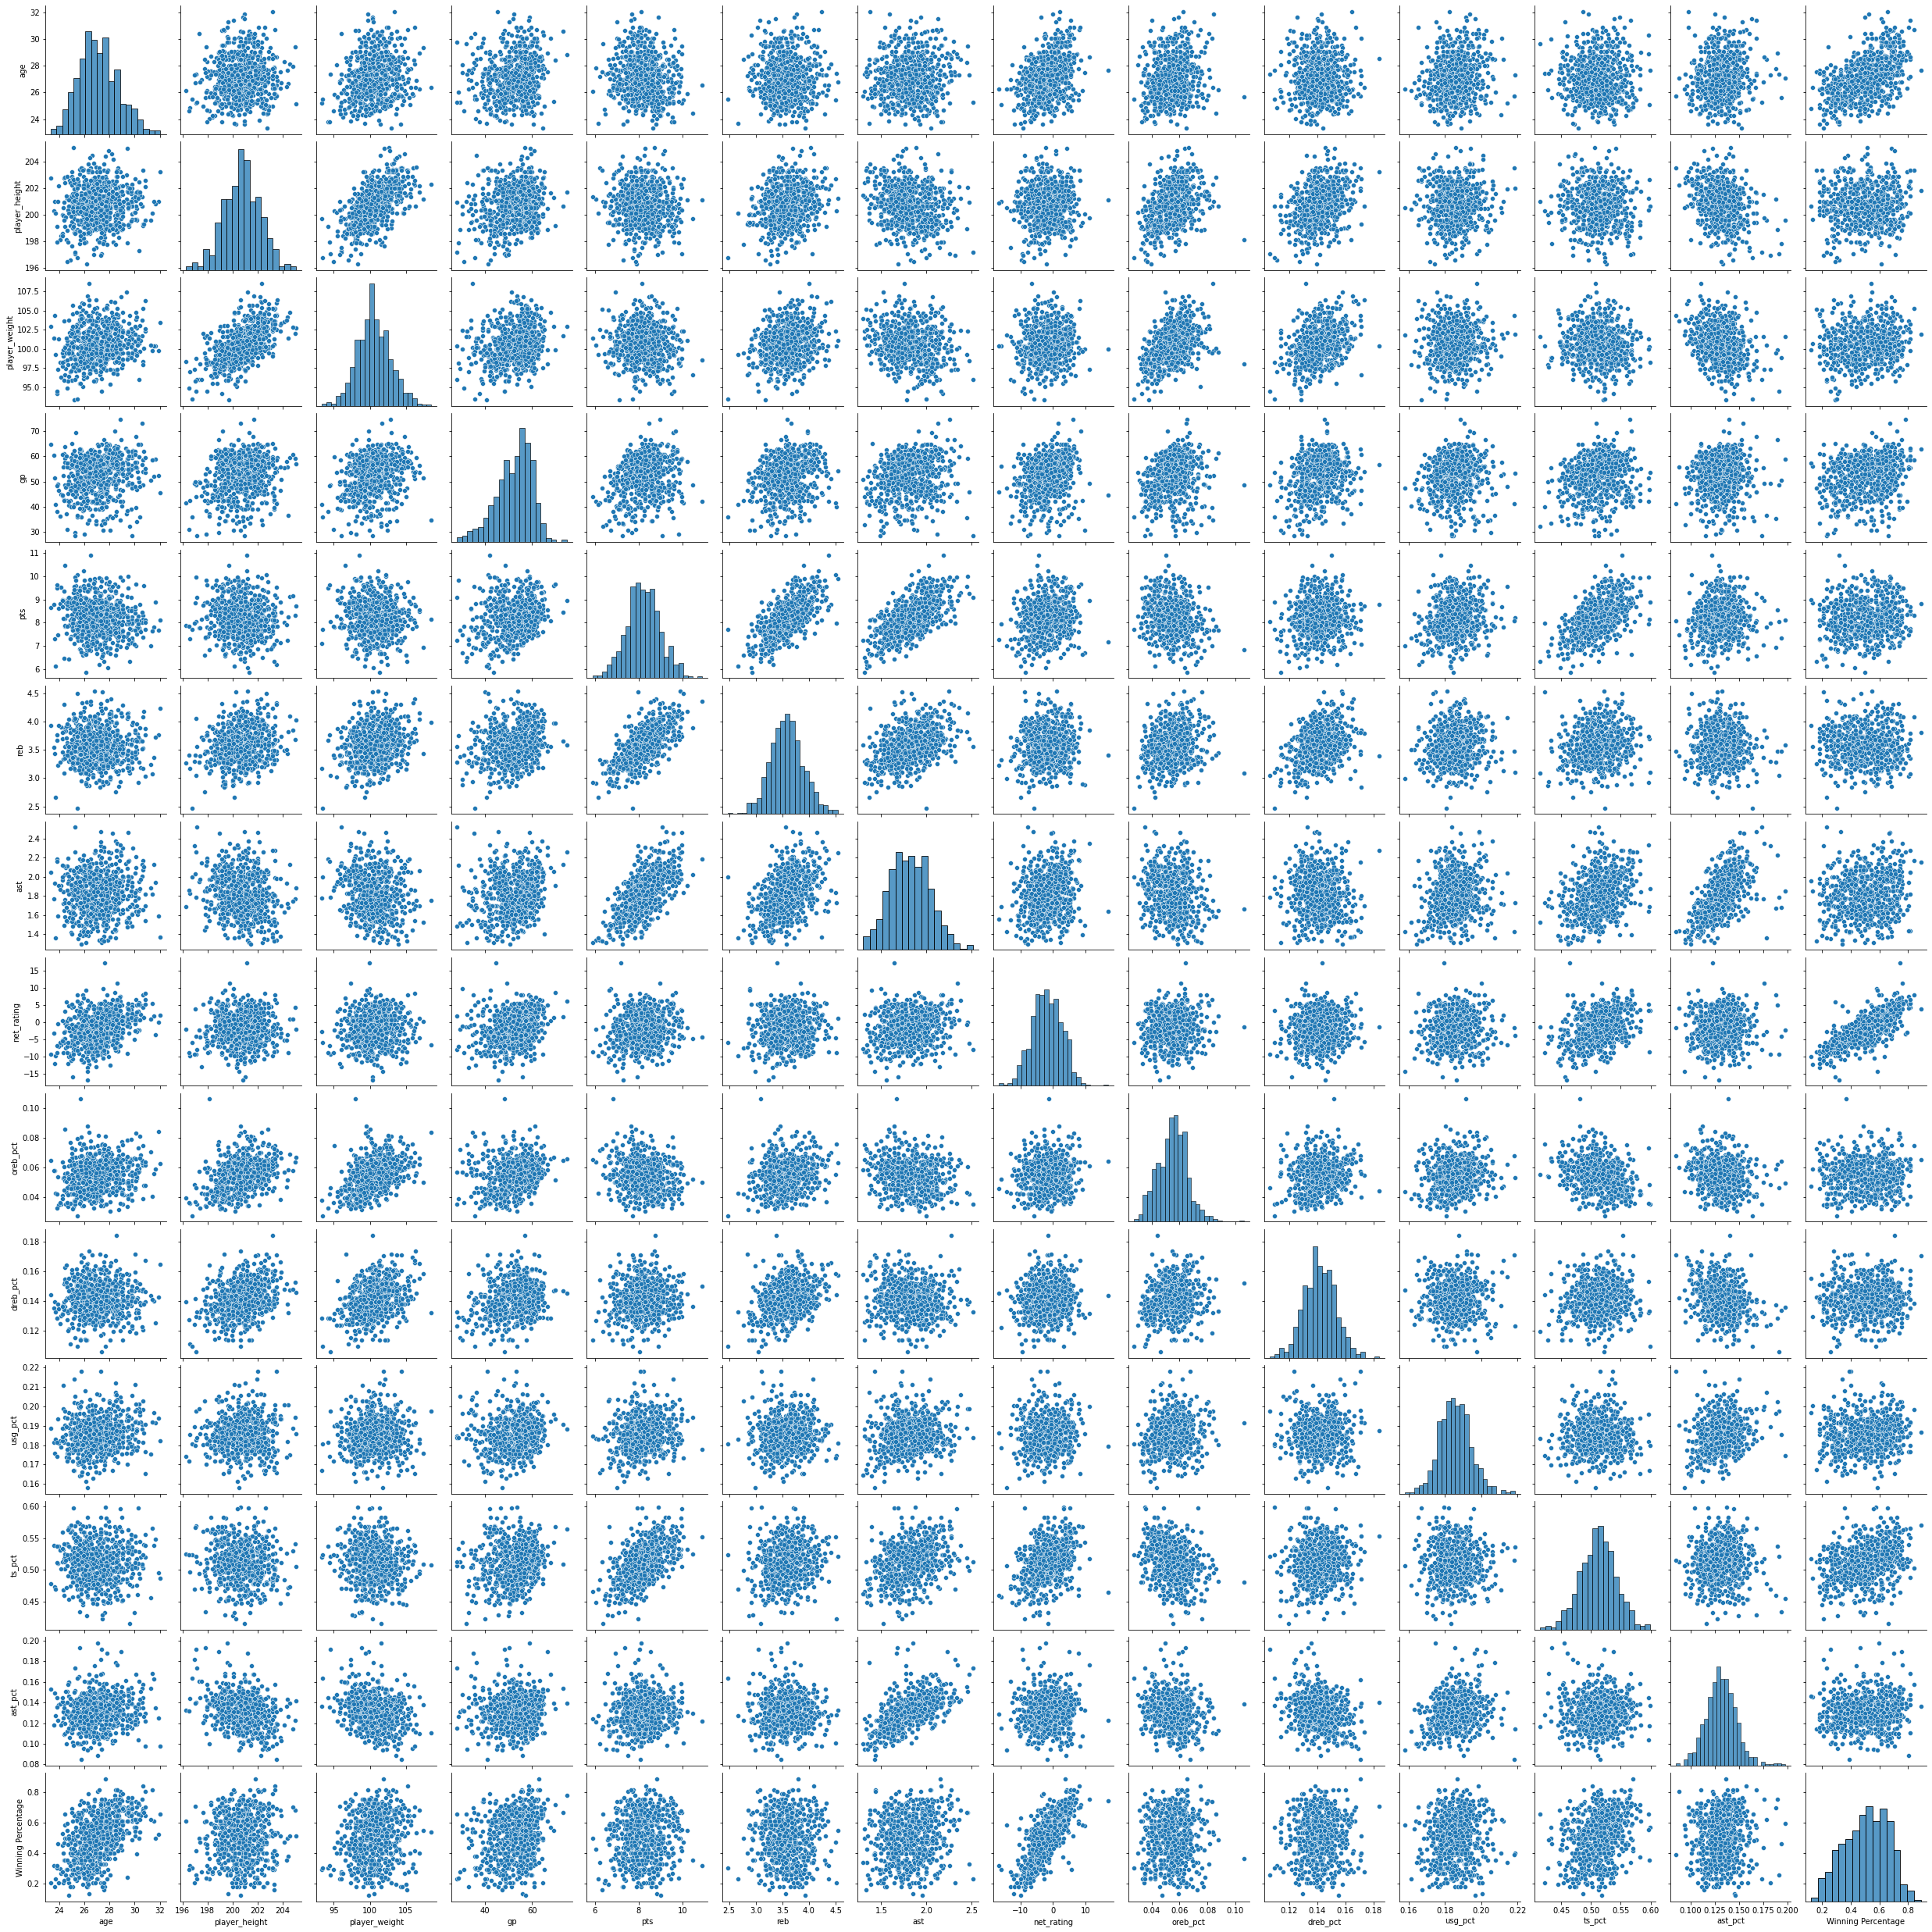

In [44]:
sns.pairplot(dfnew)

All variables seems to have a normal distribution.

<AxesSubplot:>

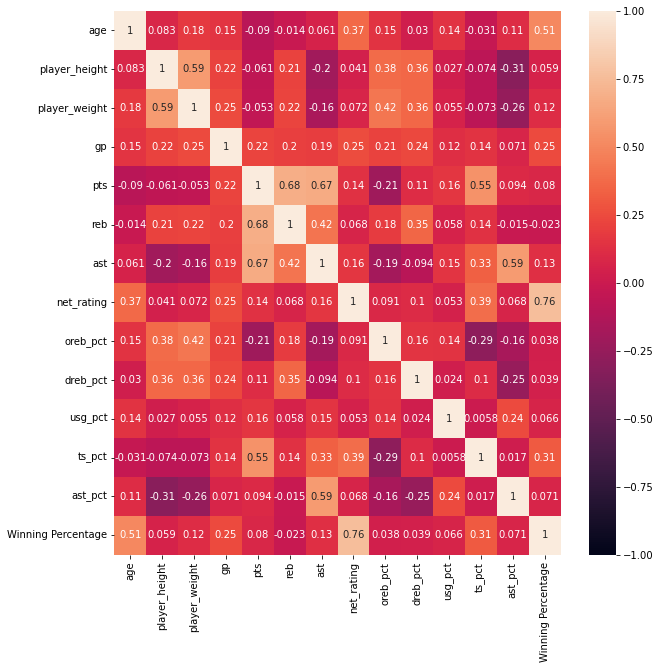

In [45]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(dfnew.corr(),annot=True,vmin=-1,vmax=1)

There are some correlation exist between variables -- dimension reduction may be needed.

Now, we are dividing the teams into 3 categories based on their winning ratio.
There are three categories: 0.Superstar 1.Winning 2.Normal

In [46]:
def cat(i):
    if  i>0.6 :
        return "0"
    elif i <= 0.6 and i > 0.3  :
        return "1"
    else:
        return "2"

In [47]:
dfnew['wp'] = dfnew['Winning Percentage'].apply(cat)

In [48]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 667 entries, 1996-9776ers to 2020-21Warriors
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 667 non-null    float64
 1   player_height       667 non-null    float64
 2   player_weight       667 non-null    float64
 3   gp                  667 non-null    float64
 4   pts                 667 non-null    float64
 5   reb                 667 non-null    float64
 6   ast                 667 non-null    float64
 7   net_rating          667 non-null    float64
 8   oreb_pct            667 non-null    float64
 9   dreb_pct            667 non-null    float64
 10  usg_pct             667 non-null    float64
 11  ts_pct              667 non-null    float64
 12  ast_pct             667 non-null    float64
 13  Winning Percentage  667 non-null    float64
 14  wp                  667 non-null    object 
dtypes: float64(14), object(1)
memory usage:

In [49]:
dfnew['wp'] = pd.to_numeric(dfnew['wp'])

In [50]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 667 entries, 1996-9776ers to 2020-21Warriors
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 667 non-null    float64
 1   player_height       667 non-null    float64
 2   player_weight       667 non-null    float64
 3   gp                  667 non-null    float64
 4   pts                 667 non-null    float64
 5   reb                 667 non-null    float64
 6   ast                 667 non-null    float64
 7   net_rating          667 non-null    float64
 8   oreb_pct            667 non-null    float64
 9   dreb_pct            667 non-null    float64
 10  usg_pct             667 non-null    float64
 11  ts_pct              667 non-null    float64
 12  ast_pct             667 non-null    float64
 13  Winning Percentage  667 non-null    float64
 14  wp                  667 non-null    int64  
dtypes: float64(14), int64(1)
memory usage: 

In [51]:
dfnew

age  player_height  player_weight         gp  \
seasonname                                                                
1996-9776ers         26.733333     199.644000     100.576466  56.200000   
1996-97Blazers       26.625000     199.707500      98.514512  51.875000   
1996-97Bucks         28.266667     202.522667     104.265681  56.400000   
1996-97Bulls         30.666667     203.369333     105.233344  58.600000   
1996-97Cavaliers     26.615385     199.878462     100.976558  62.230769   
...                        ...            ...            ...        ...   
2020-21Spurs         25.235294     198.568235      98.616237  48.294118   
2020-21Suns          26.750000     197.008750      95.821310  49.875000   
2020-21Thunder       23.833333     199.107778      94.145540  38.000000   
2020-21Timberwolves  23.812500     197.961250      94.432185  48.375000   
2020-21Warriors      25.705882     198.418824      95.521139  43.705882   

                          pts       reb       ast  net_rating  oreb_pct  \
seasonname                                                                
1996-9776ers         8.460000  4.006667  1.700000   -5.620000  0.073467   
1996-97Blazers       7.737500  3.293750  1.637500   -0.025000  0.059063   
1996-97Bucks         7.146667  3.206667  1.426667   -3.433333  0.052667   
1996-97Bulls         8.313333  4.086667  2.166667    8.020000  0.074600   
1996-97Cavaliers     7.453846  3.253846  1.769231    1.538462  0.066385   
...                       ...       ...       ...         ...       ...   
2020-21Spurs         8.576471  3.482353  1.864706   -4.405882  0.037529   
2020-21Suns          8.868750  3.412500  2.031250    3.825000  0.036937   
2020-21Thunder       9.505556  3.672222  2.183333   -8.827778  0.032667   
2020-21Timberwolves  9.612500  3.762500  2.162500   -6.800000  0.041813   
2020-21Warriors      8.976471  3.870588  2.076471   -4.211765  0.040353   

                     dreb_pct   usg_pct    ts_pct   ast_pct  \
seasonname                                                    
1996-9776ers         0.145867  0.171600  0.504867  0.116467   
1996-97Blazers       0.132562  0.191812  0.532937  0.151938   
1996-97Bucks         0.135667  0.166933  0.496600  0.100933   
1996-97Bulls         0.138333  0.198400  0.502867  0.157467   
1996-97Cavaliers     0.139923  0.186846  0.507692  0.140077   
...                       ...       ...       ...       ...   
2020-21Spurs         0.136059  0.177588  0.557118  0.125412   
2020-21Suns          0.141687  0.179938  0.566688  0.139688   
2020-21Thunder       0.128556  0.181389  0.537111  0.144278   
2020-21Timberwolves  0.128312  0.174313  0.511375  0.135187   
2020-21Warriors      0.153588  0.185353  0.563882  0.142235   

                     Winning Percentage  wp  
seasonname                                   
1996-9776ers                   0.268000   2  
1996-97Blazers                 0.598000   1  
1996-97Bucks                   0.402000   1  
1996-97Bulls                   0.841000   0  
1996-97Cavaliers               0.512000   1  
...                                 ...  ..  
2020-21Spurs                   0.458333   1  
2020-21Suns                    0.708333   0  
2020-21Thunder                 0.305556   1  
2020-21Timberwolves            0.319444   1  
2020-21Warriors                0.541667   1  

[667 rows x 15 columns]

In [52]:
dfnew.groupby('wp').count()

age  player_height  player_weight   gp  pts  reb  ast  net_rating  \
wp                                                                      
0   208            208            208  208  208  208  208         208   
1   382            382            382  382  382  382  382         382   
2    77             77             77   77   77   77   77          77   

    oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  Winning Percentage  
wp                                                                    
0        208       208      208     208      208                 208  
1        382       382      382     382      382                 382  
2         77        77       77      77       77                  77

When we divide the groups into 3 categories, the dataset seems to be imbalanced. 

# Classification

KNN

In [53]:
X = dfnew[['age', 'player_height', 'player_weight','gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct' ]]
Y = dfnew['wp']

In [54]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state = 123456)

In [55]:
x_train

age  player_height  player_weight         gp  \
seasonname                                                             
2014-15Heat       28.117647     199.165882      99.176557  43.588235   
2016-17Pacers     27.500000     199.231250     101.632958  57.125000   
2001-02Bulls      25.076923     200.855385      99.964698  57.538462   
2010-11Clippers   25.357143     200.115714     104.714953  57.928571   
2000-01Mavericks  26.733333     203.877333     103.328258  50.733333   
...                     ...            ...            ...        ...   
2003-04Blazers    26.105263     201.328421     101.342002  43.842105   
2017-18Nets       25.222222     201.083333      98.857856  47.222222   
1998-99Blazers    27.800000     201.168000      99.427366  35.333333   
2015-16Celtics    24.466667     199.136000     100.153114  57.533333   
1998-99Pistons    27.470588     200.062353      99.923649  30.529412   

                       pts       reb       ast  net_rating  oreb_pct  \
seasonname                                                             
2014-15Heat       8.664706  3.494118  1.700000   -3.176471  0.043882   
2016-17Pacers     8.093750  3.337500  1.812500   -3.631250  0.046437   
2001-02Bulls      7.723077  3.215385  1.807692   -9.200000  0.049538   
2010-11Clippers   9.271429  3.871429  2.050000   -5.378571  0.053500   
2000-01Mavericks  8.446667  3.733333  1.700000   -3.260000  0.066133   
...                    ...       ...       ...         ...       ...   
2003-04Blazers    5.878947  2.926316  1.310526   -8.578947  0.065474   
2017-18Nets       8.688889  3.377778  1.933333   -4.688889  0.037333   
1998-99Blazers    6.946667  3.280000  1.673333    7.993333  0.059133   
2015-16Celtics    7.873333  3.346667  1.733333    3.193333  0.050933   
1998-99Pistons    6.711765  2.882353  1.494118    9.811765  0.063412   

                  dreb_pct   usg_pct    ts_pct   ast_pct  
seasonname                                                
2014-15Heat       0.138529  0.188588  0.516765  0.123059  
2016-17Pacers     0.151562  0.192438  0.516875  0.134813  
2001-02Bulls      0.136615  0.194846  0.498615  0.139154  
2010-11Clippers   0.150000  0.191571  0.533857  0.142786  
2000-01Mavericks  0.159467  0.193600  0.511667  0.103133  
...                    ...       ...       ...       ...  
2003-04Blazers    0.113737  0.184526  0.465263  0.124105  
2017-18Nets       0.133889  0.182500  0.527889  0.138444  
1998-99Blazers    0.137600  0.196333  0.460000  0.187533  
2015-16Celtics    0.162400  0.197400  0.512533  0.119400  
1998-99Pistons    0.128824  0.185765  0.542941  0.132471  

[466 rows x 13 columns]

In [56]:
i= 1
accuracy_list=[]
while i < 10:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    accuracy_list.append(accuracy_score(y_test,pred))
    i=i+1

In [57]:
pred

array([0, 1, 0, 1, 1, 0, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 2, 1,
       0, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0], dtype=int64)

In [58]:
y_test

seasonname
2004-05Timberwolves    1
2002-03Nuggets         2
2010-11Nuggets         0
2015-16Thunder         0
2014-15Bucks           1
                      ..
2008-09Hawks           1
2000-01Heat            0
1997-98Mavericks       2
2004-05Cavaliers       1
2001-02Blazers         1
Name: wp, Length: 201, dtype: int64

In [59]:
accuracy_list

[0.6368159203980099,
 0.6666666666666666,
 0.6766169154228856,
 0.7114427860696517,
 0.681592039800995,
 0.7213930348258707,
 0.6915422885572139,
 0.7114427860696517,
 0.7114427860696517]

Naive Bayes

In [60]:
train, test = train_test_split(dfnew, test_size = 0.3, random_state = 123456)

In [61]:
train.columns

Index(['age', 'player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast',
       'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct',
       'Winning Percentage', 'wp'],
      dtype='object')

In [62]:
features = ['age', 'player_height', 'player_weight','gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct' ]

In [63]:
target = 'wp'
classifier = gnb()

In [64]:
cv_score = cross_val_score(classifier, train[features], train[target], cv=5)

In [65]:
cv_score.mean()

0.6996568291008923

In [66]:
cv_score.var()

0.0019278369147625045

In [67]:
model = gnb().fit(train[features], train[target])
test_x = test[features]
test_y = test[target]
pred1 = model.predict(test_x[features])

In [68]:
pred1

array([0, 2, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 2, 0, 0, 1,
       2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 1, 1, 1, 1,
       0, 0, 0, 2, 1, 1, 2, 1, 0, 1, 1, 0, 0, 0, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0], dtype=int64)

In [69]:
test_y

seasonname
2004-05Timberwolves    1
2002-03Nuggets         2
2010-11Nuggets         0
2015-16Thunder         0
2014-15Bucks           1
                      ..
2008-09Hawks           1
2000-01Heat            0
1997-98Mavericks       2
2004-05Cavaliers       1
2001-02Blazers         1
Name: wp, Length: 201, dtype: int64

In [70]:
accuracy_score(test_y, pred1)

0.6965174129353234

Accuracy scores for both KNN and NB aren't very good -- imbalanced data. KNN is slightly better than Naive Bayes.

Let's try to divide the teams into 2 categories only.
0. Winning team 1. Normal team

In [71]:
def cate(i):
    if  i>0.5:
        return "0"
    else :
        return "1"

In [72]:
dfnew['wp2'] = dfnew['Winning Percentage'].apply(cate)

In [73]:
dfnew['wp2'] = pd.to_numeric(dfnew['wp2'])

In [74]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 667 entries, 1996-9776ers to 2020-21Warriors
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 667 non-null    float64
 1   player_height       667 non-null    float64
 2   player_weight       667 non-null    float64
 3   gp                  667 non-null    float64
 4   pts                 667 non-null    float64
 5   reb                 667 non-null    float64
 6   ast                 667 non-null    float64
 7   net_rating          667 non-null    float64
 8   oreb_pct            667 non-null    float64
 9   dreb_pct            667 non-null    float64
 10  usg_pct             667 non-null    float64
 11  ts_pct              667 non-null    float64
 12  ast_pct             667 non-null    float64
 13  Winning Percentage  667 non-null    float64
 14  wp                  667 non-null    int64  
 15  wp2                 667 non-null    int

In [75]:
dfnew

age  player_height  player_weight         gp  \
seasonname                                                                
1996-9776ers         26.733333     199.644000     100.576466  56.200000   
1996-97Blazers       26.625000     199.707500      98.514512  51.875000   
1996-97Bucks         28.266667     202.522667     104.265681  56.400000   
1996-97Bulls         30.666667     203.369333     105.233344  58.600000   
1996-97Cavaliers     26.615385     199.878462     100.976558  62.230769   
...                        ...            ...            ...        ...   
2020-21Spurs         25.235294     198.568235      98.616237  48.294118   
2020-21Suns          26.750000     197.008750      95.821310  49.875000   
2020-21Thunder       23.833333     199.107778      94.145540  38.000000   
2020-21Timberwolves  23.812500     197.961250      94.432185  48.375000   
2020-21Warriors      25.705882     198.418824      95.521139  43.705882   

                          pts       reb       ast  net_rating  oreb_pct  \
seasonname                                                                
1996-9776ers         8.460000  4.006667  1.700000   -5.620000  0.073467   
1996-97Blazers       7.737500  3.293750  1.637500   -0.025000  0.059063   
1996-97Bucks         7.146667  3.206667  1.426667   -3.433333  0.052667   
1996-97Bulls         8.313333  4.086667  2.166667    8.020000  0.074600   
1996-97Cavaliers     7.453846  3.253846  1.769231    1.538462  0.066385   
...                       ...       ...       ...         ...       ...   
2020-21Spurs         8.576471  3.482353  1.864706   -4.405882  0.037529   
2020-21Suns          8.868750  3.412500  2.031250    3.825000  0.036937   
2020-21Thunder       9.505556  3.672222  2.183333   -8.827778  0.032667   
2020-21Timberwolves  9.612500  3.762500  2.162500   -6.800000  0.041813   
2020-21Warriors      8.976471  3.870588  2.076471   -4.211765  0.040353   

                     dreb_pct   usg_pct    ts_pct   ast_pct  \
seasonname                                                    
1996-9776ers         0.145867  0.171600  0.504867  0.116467   
1996-97Blazers       0.132562  0.191812  0.532937  0.151938   
1996-97Bucks         0.135667  0.166933  0.496600  0.100933   
1996-97Bulls         0.138333  0.198400  0.502867  0.157467   
1996-97Cavaliers     0.139923  0.186846  0.507692  0.140077   
...                       ...       ...       ...       ...   
2020-21Spurs         0.136059  0.177588  0.557118  0.125412   
2020-21Suns          0.141687  0.179938  0.566688  0.139688   
2020-21Thunder       0.128556  0.181389  0.537111  0.144278   
2020-21Timberwolves  0.128312  0.174313  0.511375  0.135187   
2020-21Warriors      0.153588  0.185353  0.563882  0.142235   

                     Winning Percentage  wp  wp2  
seasonname                                        
1996-9776ers                   0.268000   2    1  
1996-97Blazers                 0.598000   1    0  
1996-97Bucks                   0.402000   1    1  
1996-97Bulls                   0.841000   0    0  
1996-97Cavaliers               0.512000   1    0  
...                                 ...  ..  ...  
2020-21Spurs                   0.458333   1    1  
2020-21Suns                    0.708333   0    0  
2020-21Thunder                 0.305556   1    1  
2020-21Timberwolves            0.319444   1    1  
2020-21Warriors                0.541667   1    0  

[667 rows x 16 columns]

In [76]:
dfnew.groupby('wp2').count()

age  player_height  player_weight   gp  pts  reb  ast  net_rating  \
wp2                                                                      
0    352            352            352  352  352  352  352         352   
1    315            315            315  315  315  315  315         315   

     oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  Winning Percentage   wp  
wp2                                                                         
0         352       352      352     352      352                 352  352  
1         315       315      315     315      315                 315  315

When we divide the groups into 2 categories, the dataset looks more balanced. 

In [77]:
Y2 = dfnew['wp2']

In [78]:
x_train, x_test, y_train, y_test = train_test_split(X,Y2, test_size=0.3, random_state =123456)

In [79]:
i= 1
accuracy_list=[]
while i < 10:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    accuracy_list.append(accuracy_score(y_test,pred))
    i=i+1

In [80]:
accuracy_list

[0.7164179104477612,
 0.6666666666666666,
 0.7562189054726368,
 0.7761194029850746,
 0.7860696517412935,
 0.7711442786069652,
 0.7611940298507462,
 0.7661691542288557,
 0.7910447761194029]

Results are better when we divide the teams into 2 categories.

In [81]:
model1 = knn.fit(x_train,y_train)

In [82]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(model1, random_state=1).fit(X, Y2)

In [83]:
eli5.show_weights(perm, feature_names = X.columns.tolist())

The above chart shows what features are the most important.

# Logistic Regression

In [84]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, roc_curve, roc_auc_score, precision_recall_curve, confusion_matrix, recall_score

In [85]:
log = LogisticRegression()

In [86]:
x_train, x_test, y_train, y_test = train_test_split(X,Y2, test_size=0.3, random_state = 123456)

In [87]:
log.fit(x_train,y_train)

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [88]:
yhat_log = log.predict_proba(x_test)

In [89]:
yhat_log

array([[9.29557336e-01, 7.04426641e-02],
       [2.05232777e-02, 9.79476722e-01],
       [9.13868350e-01, 8.61316496e-02],
       [8.74224201e-01, 1.25775799e-01],
       [3.01559801e-01, 6.98440199e-01],
       [8.80483700e-01, 1.19516300e-01],
       [9.03082970e-01, 9.69170303e-02],
       [8.44213667e-01, 1.55786333e-01],
       [2.43729758e-02, 9.75627024e-01],
       [2.46397101e-01, 7.53602899e-01],
       [1.45297285e-01, 8.54702715e-01],
       [2.98711708e-02, 9.70128829e-01],
       [4.99384089e-01, 5.00615911e-01],
       [3.96349385e-01, 6.03650615e-01],
       [7.22258524e-01, 2.77741476e-01],
       [7.40065390e-01, 2.59934610e-01],
       [8.16778279e-01, 1.83221721e-01],
       [9.77434956e-01, 2.25650440e-02],
       [7.42238503e-01, 2.57761497e-01],
       [1.17514100e-01, 8.82485900e-01],
       [9.59122990e-01, 4.08770100e-02],
       [3.03511086e-01, 6.96488914e-01],
       [2.84438496e-01, 7.15561504e-01],
       [9.50930916e-01, 4.90690836e-02],
       [1.392328

In [90]:
log.predict(x_test)

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0], dtype=int64)

In [91]:
yhat_log[:,1]

array([7.04426641e-02, 9.79476722e-01, 8.61316496e-02, 1.25775799e-01,
       6.98440199e-01, 1.19516300e-01, 9.69170303e-02, 1.55786333e-01,
       9.75627024e-01, 7.53602899e-01, 8.54702715e-01, 9.70128829e-01,
       5.00615911e-01, 6.03650615e-01, 2.77741476e-01, 2.59934610e-01,
       1.83221721e-01, 2.25650440e-02, 2.57761497e-01, 8.82485900e-01,
       4.08770100e-02, 6.96488914e-01, 7.15561504e-01, 4.90690836e-02,
       8.60767199e-01, 4.09553182e-02, 1.78579732e-01, 7.82413094e-01,
       3.59631071e-01, 7.46927339e-01, 6.61232854e-01, 2.33768881e-01,
       7.70640808e-01, 3.09086033e-01, 4.22873064e-02, 4.47045717e-01,
       9.91065389e-03, 9.07758413e-01, 7.45864264e-01, 7.09121483e-01,
       1.12043189e-01, 1.68102567e-02, 2.60710623e-01, 4.81346136e-01,
       5.23648215e-01, 8.13197625e-01, 7.19197247e-02, 5.18053573e-01,
       8.15224307e-01, 7.62290636e-01, 3.33682417e-01, 1.21544751e-01,
       2.51451980e-02, 4.67633586e-02, 6.29841365e-01, 1.82655787e-02,
      

In [92]:
y_test

seasonname
2004-05Timberwolves    0
2002-03Nuggets         1
2010-11Nuggets         0
2015-16Thunder         0
2014-15Bucks           1
                      ..
2008-09Hawks           0
2000-01Heat            0
1997-98Mavericks       1
2004-05Cavaliers       0
2001-02Blazers         0
Name: wp2, Length: 201, dtype: int64

In [93]:
c0, c1, thresholds = roc_curve(y_test, yhat_log[:,1])

Text(0, 0.5, 'Category 1')

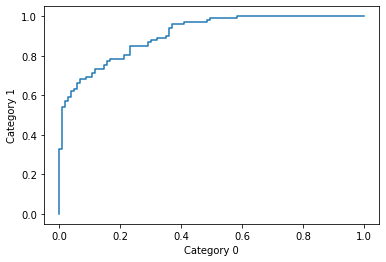

In [94]:
import matplotlib.pyplot as plt
plt.plot(c0,c1)
plt.xlabel('Category 0')
plt.ylabel('Category 1')

The roc curve looks okay.

Let's try to compare logistic regression with Navie Bayes. 

In [95]:
nb = gnb()
nb.fit(x_train,y_train)
yhat_nb = nb.predict_proba(x_test)
c0_nb, c1_nb, thresholds_nb = roc_curve(y_test, yhat_nb[:,1])
gmeans_nb = np.sqrt(c0_nb*(1-c1_nb))

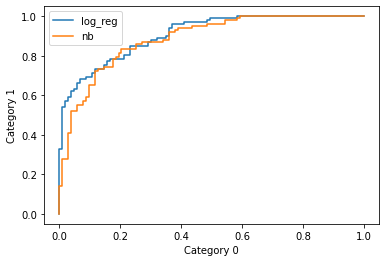

In [96]:
plt.plot(c0,c1, label='log_reg')
plt.plot(c0_nb,c1_nb, label='nb')
plt.xlabel('Category 0')
plt.ylabel('Category 1')
plt.legend()

The logistic regression is slightly better than Navie Bayes for this problem. 

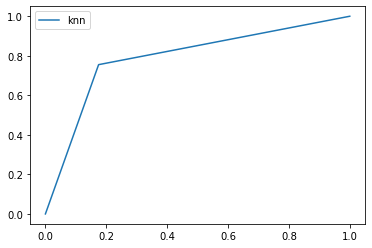

In [97]:
yhat_knn = knn.predict(x_test)
c0_knn, c1_knn, thresholds_knn = roc_curve(y_test, yhat_knn)
plt.plot(c0_knn,c1_knn, label='knn')
plt.legend()

logistic regression looks better than KNN.

We will use PCA to reduce dimensionality and try to improve the classification results. 

# Principle Component Analysis

In [98]:
from sklearn.decomposition import PCA

In [99]:
feature_cols = dfnew.iloc[:, 1:13] #Select all the features columns

In [100]:
feature_cols

player_height  player_weight         gp       pts  \
seasonname                                                               
1996-9776ers            199.644000     100.576466  56.200000  8.460000   
1996-97Blazers          199.707500      98.514512  51.875000  7.737500   
1996-97Bucks            202.522667     104.265681  56.400000  7.146667   
1996-97Bulls            203.369333     105.233344  58.600000  8.313333   
1996-97Cavaliers        199.878462     100.976558  62.230769  7.453846   
...                            ...            ...        ...       ...   
2020-21Spurs            198.568235      98.616237  48.294118  8.576471   
2020-21Suns             197.008750      95.821310  49.875000  8.868750   
2020-21Thunder          199.107778      94.145540  38.000000  9.505556   
2020-21Timberwolves     197.961250      94.432185  48.375000  9.612500   
2020-21Warriors         198.418824      95.521139  43.705882  8.976471   

                          reb       ast  net_rating  oreb_pct  dreb_pct  \
seasonname                                                                
1996-9776ers         4.006667  1.700000   -5.620000  0.073467  0.145867   
1996-97Blazers       3.293750  1.637500   -0.025000  0.059063  0.132562   
1996-97Bucks         3.206667  1.426667   -3.433333  0.052667  0.135667   
1996-97Bulls         4.086667  2.166667    8.020000  0.074600  0.138333   
1996-97Cavaliers     3.253846  1.769231    1.538462  0.066385  0.139923   
...                       ...       ...         ...       ...       ...   
2020-21Spurs         3.482353  1.864706   -4.405882  0.037529  0.136059   
2020-21Suns          3.412500  2.031250    3.825000  0.036937  0.141687   
2020-21Thunder       3.672222  2.183333   -8.827778  0.032667  0.128556   
2020-21Timberwolves  3.762500  2.162500   -6.800000  0.041813  0.128312   
2020-21Warriors      3.870588  2.076471   -4.211765  0.040353  0.153588   

                      usg_pct    ts_pct   ast_pct  
seasonname                                         
1996-9776ers         0.171600  0.504867  0.116467  
1996-97Blazers       0.191812  0.532937  0.151938  
1996-97Bucks         0.166933  0.496600  0.100933  
1996-97Bulls         0.198400  0.502867  0.157467  
1996-97Cavaliers     0.186846  0.507692  0.140077  
...                       ...       ...       ...  
2020-21Spurs         0.177588  0.557118  0.125412  
2020-21Suns          0.179938  0.566688  0.139688  
2020-21Thunder       0.181389  0.537111  0.144278  
2020-21Timberwolves  0.174313  0.511375  0.135187  
2020-21Warriors      0.185353  0.563882  0.142235  

[667 rows x 12 columns]

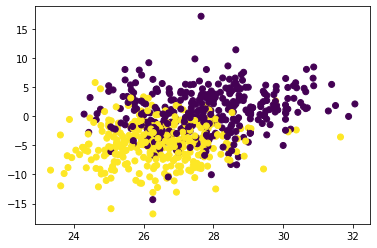

In [101]:
plt.scatter(dfnew['age'], dfnew['net_rating'], c=dfnew['wp2'])

We will explore the result of reducing the number of components to 4.

In [102]:
pca_1 = PCA(n_components = 4)

In [103]:
components = pca_1.fit_transform(feature_cols)

In [104]:
pca_1.explained_variance_ratio_

array([0.69099241, 0.21979899, 0.06781392, 0.01357923])

In [105]:
import plotly.express as px
fig = px.scatter_matrix(
    components,
    dimensions = range(4),
    color = dfnew['wp2'])


In [106]:
fig.show()

From the above scatter matrix we can see that the combination of components 0&1, 1&2, 1&3 can seperate the category well. 

In [107]:
pca_2 = PCA(n_components =0.99)
data_2 = pca_2.fit_transform(feature_cols)
pca_2.explained_variance_ratio_

array([0.69099241, 0.21979899, 0.06781392, 0.01357923])

The above variance ratio indicates that the first 3 components will be able to explain most of the variation of the data. 

In [108]:
pca_3d = PCA(n_components = 3)

In [109]:
data_3d = pca_3d.fit_transform(feature_cols)

In [110]:
total_var = pca_3d.explained_variance_ratio_.sum() * 100

In [111]:
import plotly.express as px
fig = px.scatter_3d(
    data_3d, x=0, y=1, z=2, color =dfnew['wp2'],
    title = f'Total Explained Variance: {total_var: .2f}%',
    labels ={'0':'PC 1', '1': 'PC 2', '2': 'PC 3'}
    )
fig.show()

3 components are able to explain approx. 98% variation of the data. 

Let's see if our KNN result is improved or not.

In [112]:
X_train, X_test, Y_train, Y_test = train_test_split(data_3d, Y2, test_size=0.3, random_state = 123)

In [113]:
i= 1
accuracy_list1=[]
while i < 10:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,Y_train)
    pred1 = knn.predict(X_test)
    accuracy_list1.append(accuracy_score(Y_test,pred1))
    i=i+1

In [114]:
accuracy_list1

[0.6965174129353234,
 0.6865671641791045,
 0.7562189054726368,
 0.746268656716418,
 0.7860696517412935,
 0.7611940298507462,
 0.8109452736318408,
 0.7860696517412935,
 0.8159203980099502]

KNN results improved after dimensionality reduction.

In [115]:
log.fit(X_train,Y_train)

LogisticRegression()

In [116]:
yhat_log1 = log.predict_proba(X_test)

In [117]:
c0, c1, thresholds = roc_curve(Y_test, yhat_log1[:,1])

Text(0, 0.5, 'Category 1')

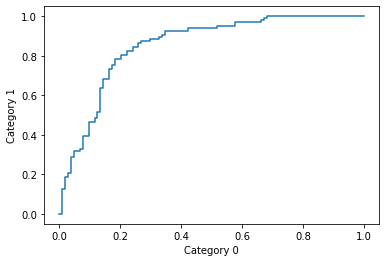

In [118]:
import matplotlib.pyplot as plt
plt.plot(c0,c1)
plt.xlabel('Category 0')
plt.ylabel('Category 1')

However logistic regression looks worse.

Below tell us which feature has the biggest impact on prediction.

In [119]:
model2 = KNeighborsClassifier()
model2.fit(data_3d, Y2)

KNeighborsClassifier()

In [120]:
results = permutation_importance(model2, data_3d, Y2, scoring='accuracy')

In [121]:
importance = results.importances_mean

In [122]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.10375
Feature: 1, Score: 0.27676
Feature: 2, Score: 0.04978


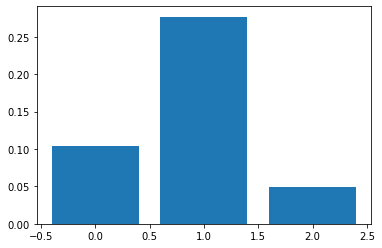

In [123]:
from matplotlib import pyplot
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()